In [1]:
import numpy as np
from simple.hurst import HurstRS, HurstDMA, HurstDSOD
from simple.funcs import hurst
from simple.numpy import rolling_apply
import matplotlib.pyplot as plt
import ipython_memory_usage
%ipython_memory_usage_start

'memory profile enabled'

used 0.1602 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 254.34 MiB
used 0.0000 MiB RAM in 0.20s, peaked 0.00 MiB above current, total RAM usage 254.34 MiB


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.subplot.left'] = 0.04
plt.rcParams['figure.subplot.right'] = 0.95
plt.rcParams['figure.subplot.top'] = 0.96
plt.rcParams['figure.subplot.bottom'] = 0.05
plt.rcParams['figure.figsize'] = (16, 5)

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.5

plt.rcParams['axes.spines.top'] = False
plt.rcParams['grid.color'] = 'lightgray'

used 0.1758 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 254.51 MiB
used 0.0000 MiB RAM in 0.22s, peaked 0.00 MiB above current, total RAM usage 254.51 MiB


In [3]:
def hurstSeries(X: np.array, Period: int) -> np.array:
    return rolling_apply(lambda x: hurst(x), Period, X, n_jobs=128, progress=True)

used 0.3555 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 254.87 MiB
used 0.0000 MiB RAM in 0.20s, peaked 0.00 MiB above current, total RAM usage 254.87 MiB


In [4]:
T = np.load('data/ETHUSDT.2022-05-08.tick.npz')['ETHUSDT'].view(np.recarray)[:20_000]
len(T)

20000

used 36.1445 MiB RAM in 0.26s, peaked 0.00 MiB above current, total RAM usage 291.01 MiB
used 0.0000 MiB RAM in 0.36s, peaked 0.00 MiB above current, total RAM usage 291.01 MiB


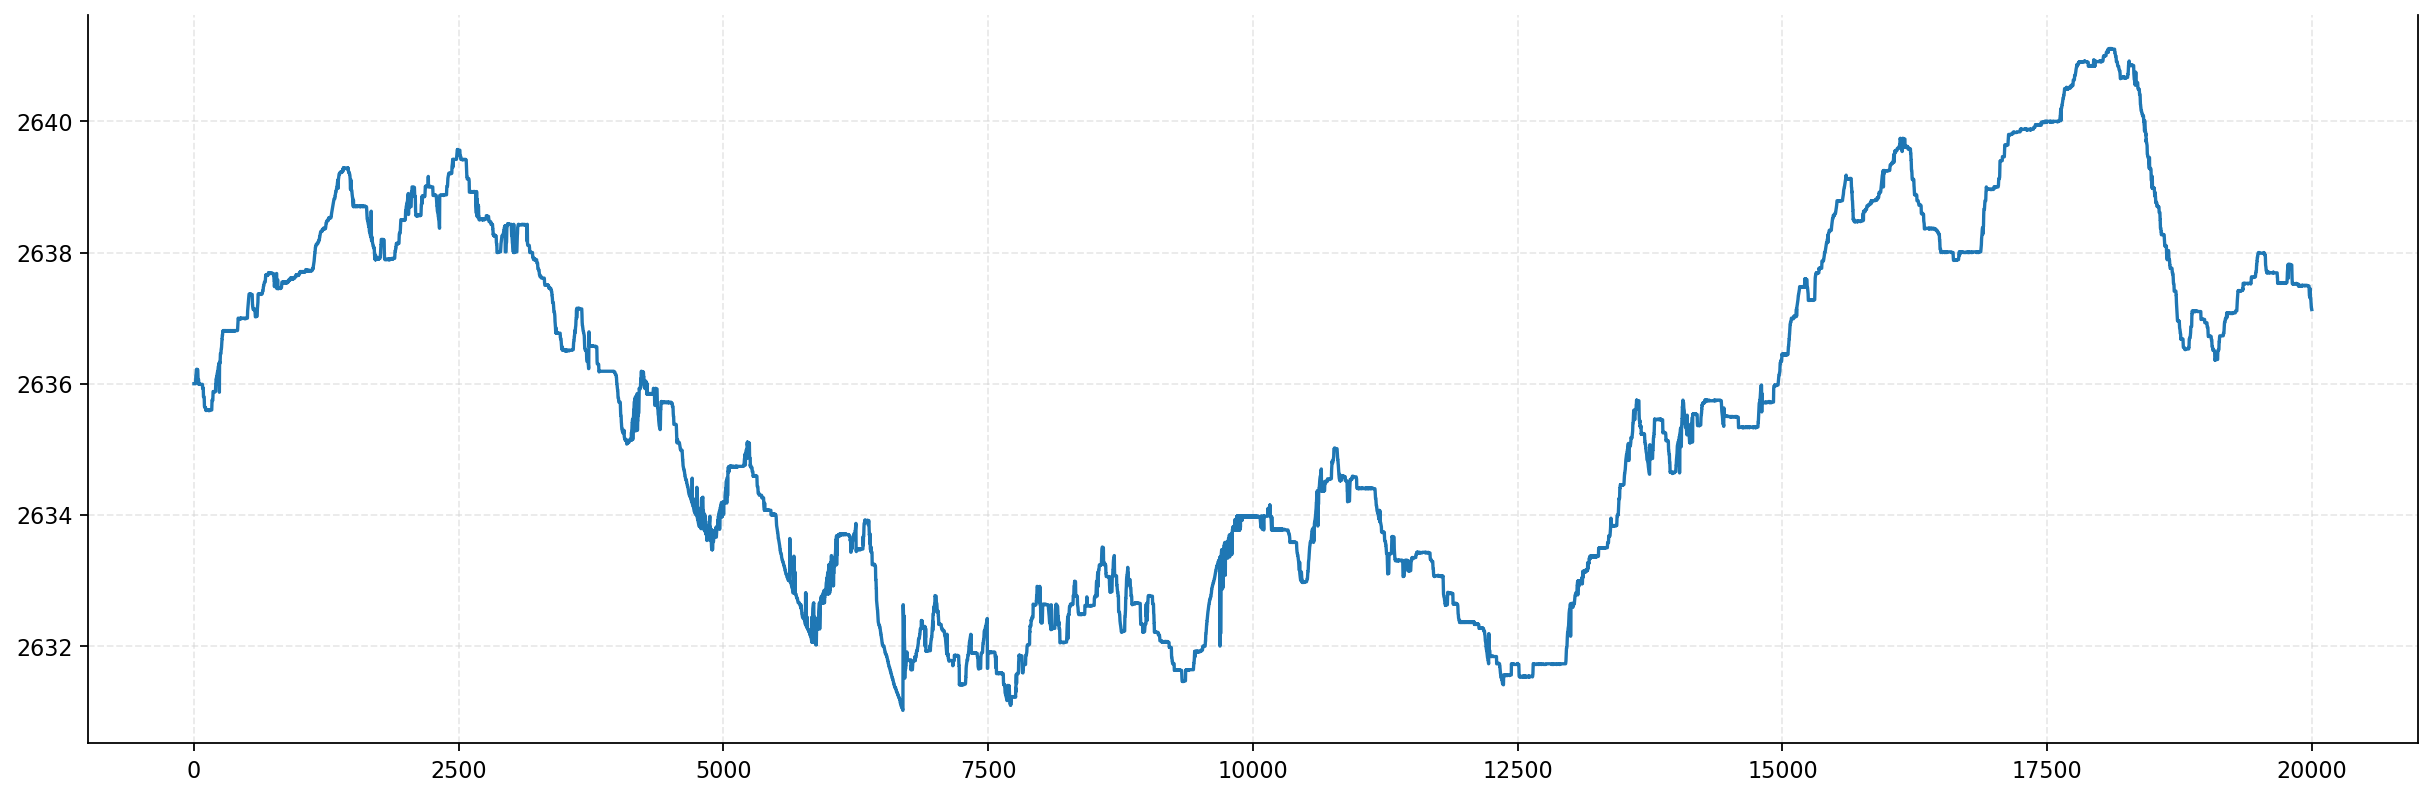

used 15.3008 MiB RAM in 0.60s, peaked 14.86 MiB above current, total RAM usage 306.31 MiB
used 0.0000 MiB RAM in 0.70s, peaked 14.86 MiB above current, total RAM usage 306.31 MiB


In [5]:
plt.plot(T.Price);

  0%|          | 0/18000 [00:00<?, ?it/s]

[0.7505379  0.75026079 0.74998908 0.74959315 0.74910325 0.74873224
 0.74844594 0.74815272 0.74791594 0.7476988 ]


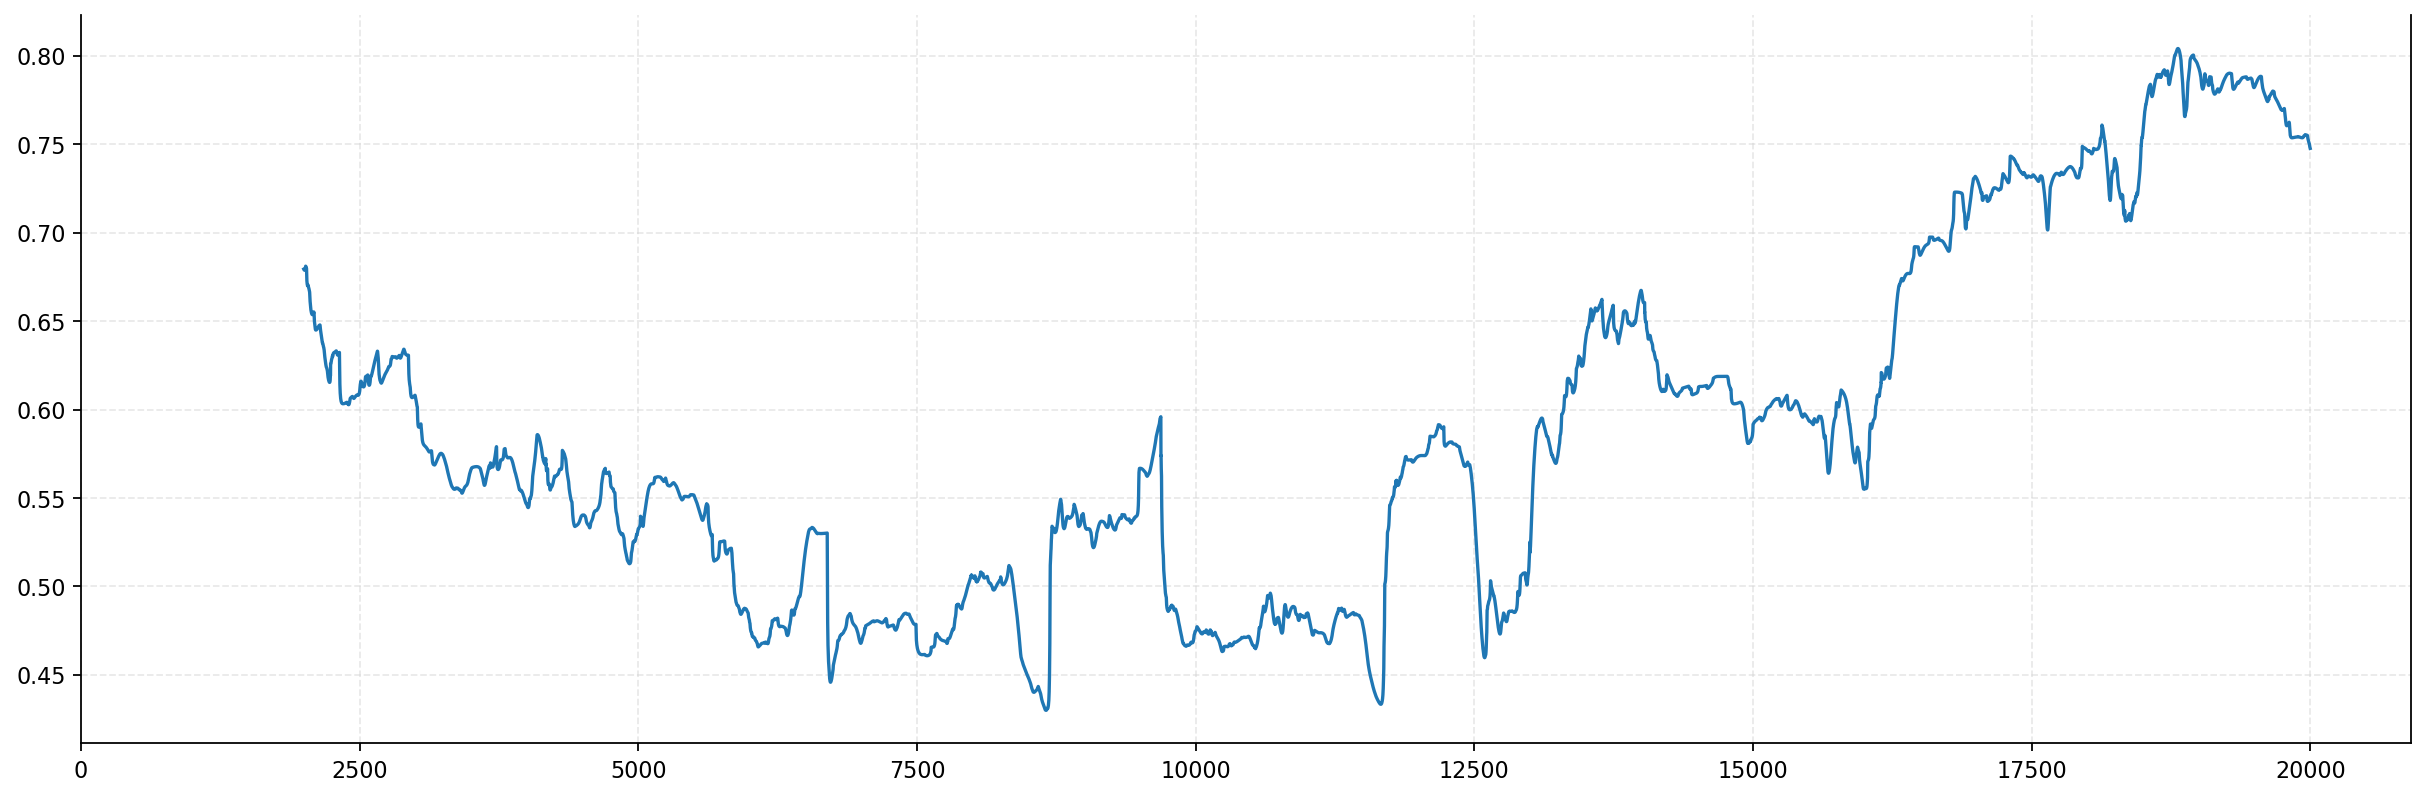

used 28.5195 MiB RAM in 47.75s, peaked 0.00 MiB above current, total RAM usage 334.83 MiB
used 0.0000 MiB RAM in 47.85s, peaked 0.00 MiB above current, total RAM usage 334.83 MiB


In [6]:
h = hurstSeries(T.Price, 2000)
print(h[-10:])

plt.plot(h)
plt.gca().set_xlim(0);

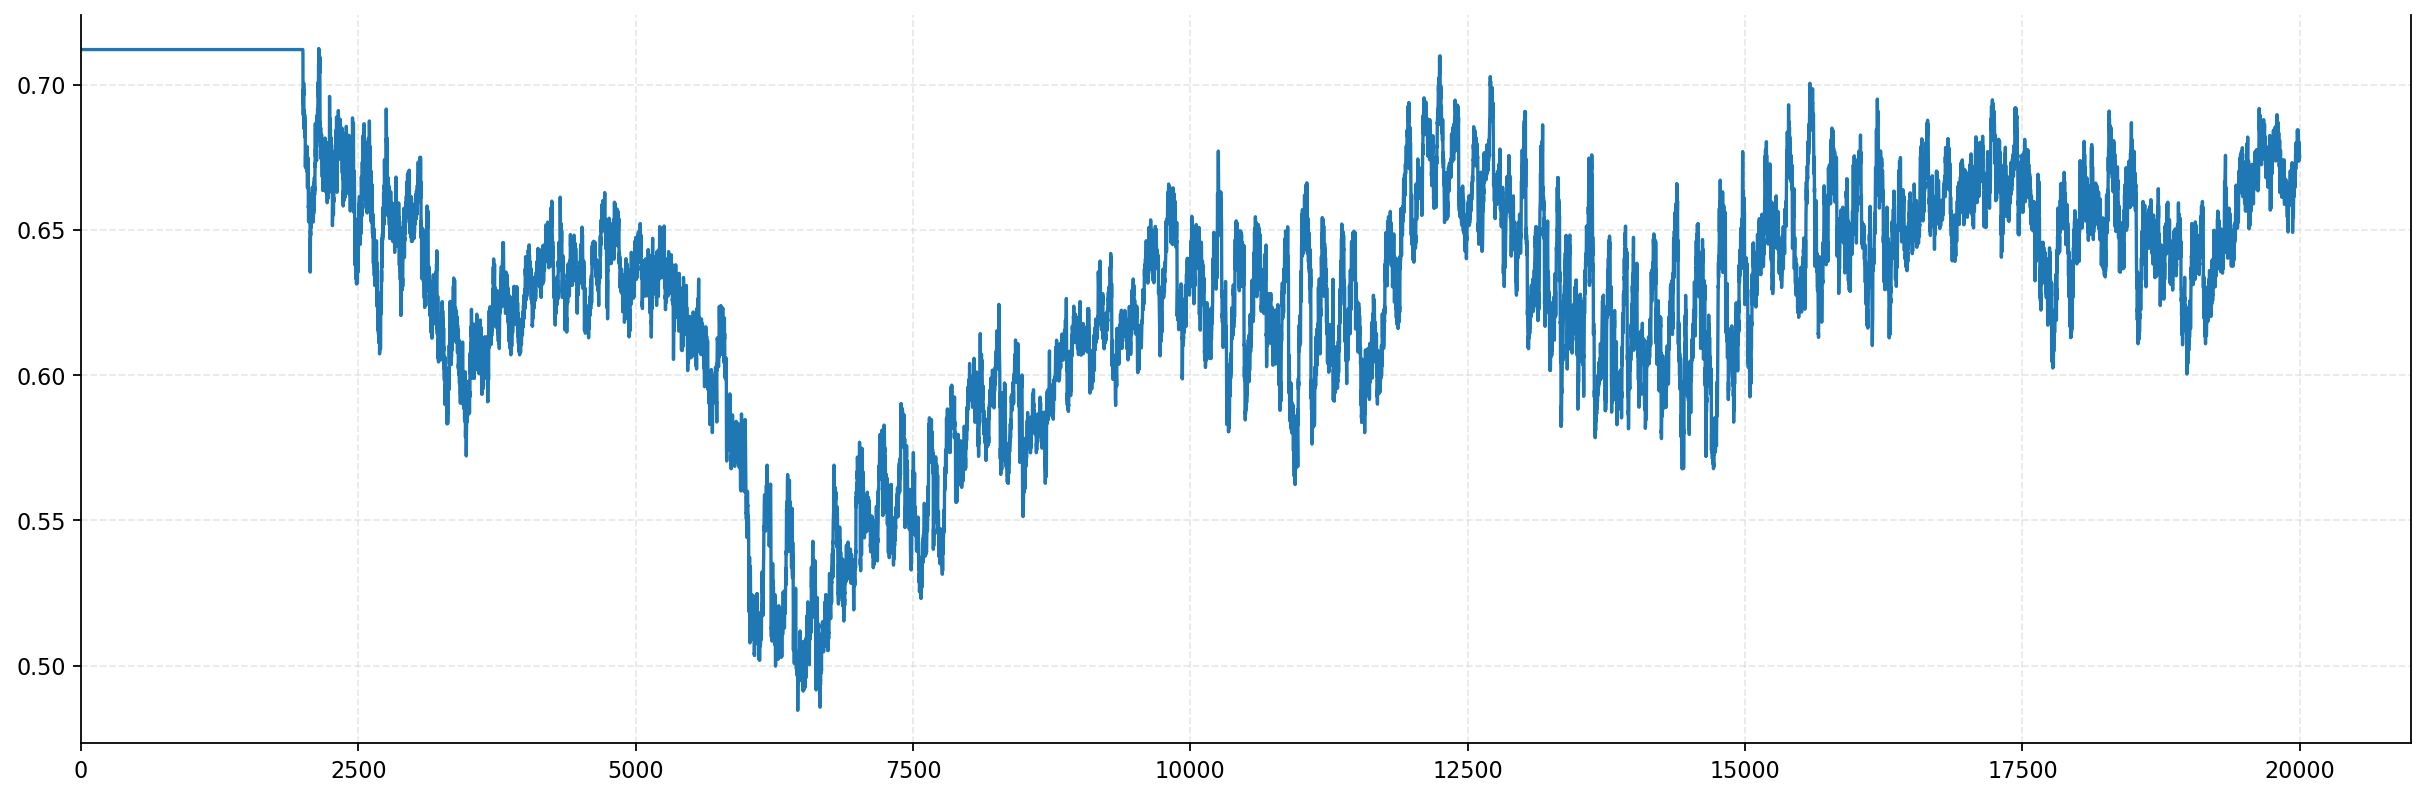

used 41.4180 MiB RAM in 4.93s, peaked 0.00 MiB above current, total RAM usage 376.25 MiB
used 0.0000 MiB RAM in 5.03s, peaked 0.00 MiB above current, total RAM usage 376.25 MiB


In [7]:
h = HurstRS(np.diff(T.Price), 2000)
h[-10:]

plt.plot(h)
plt.gca().set_xlim(0);

[0.80892976 0.80914949 0.80917066 0.80907046 0.80874399 0.80826
 0.80786885 0.80757453 0.80724061 0.8069761 ]


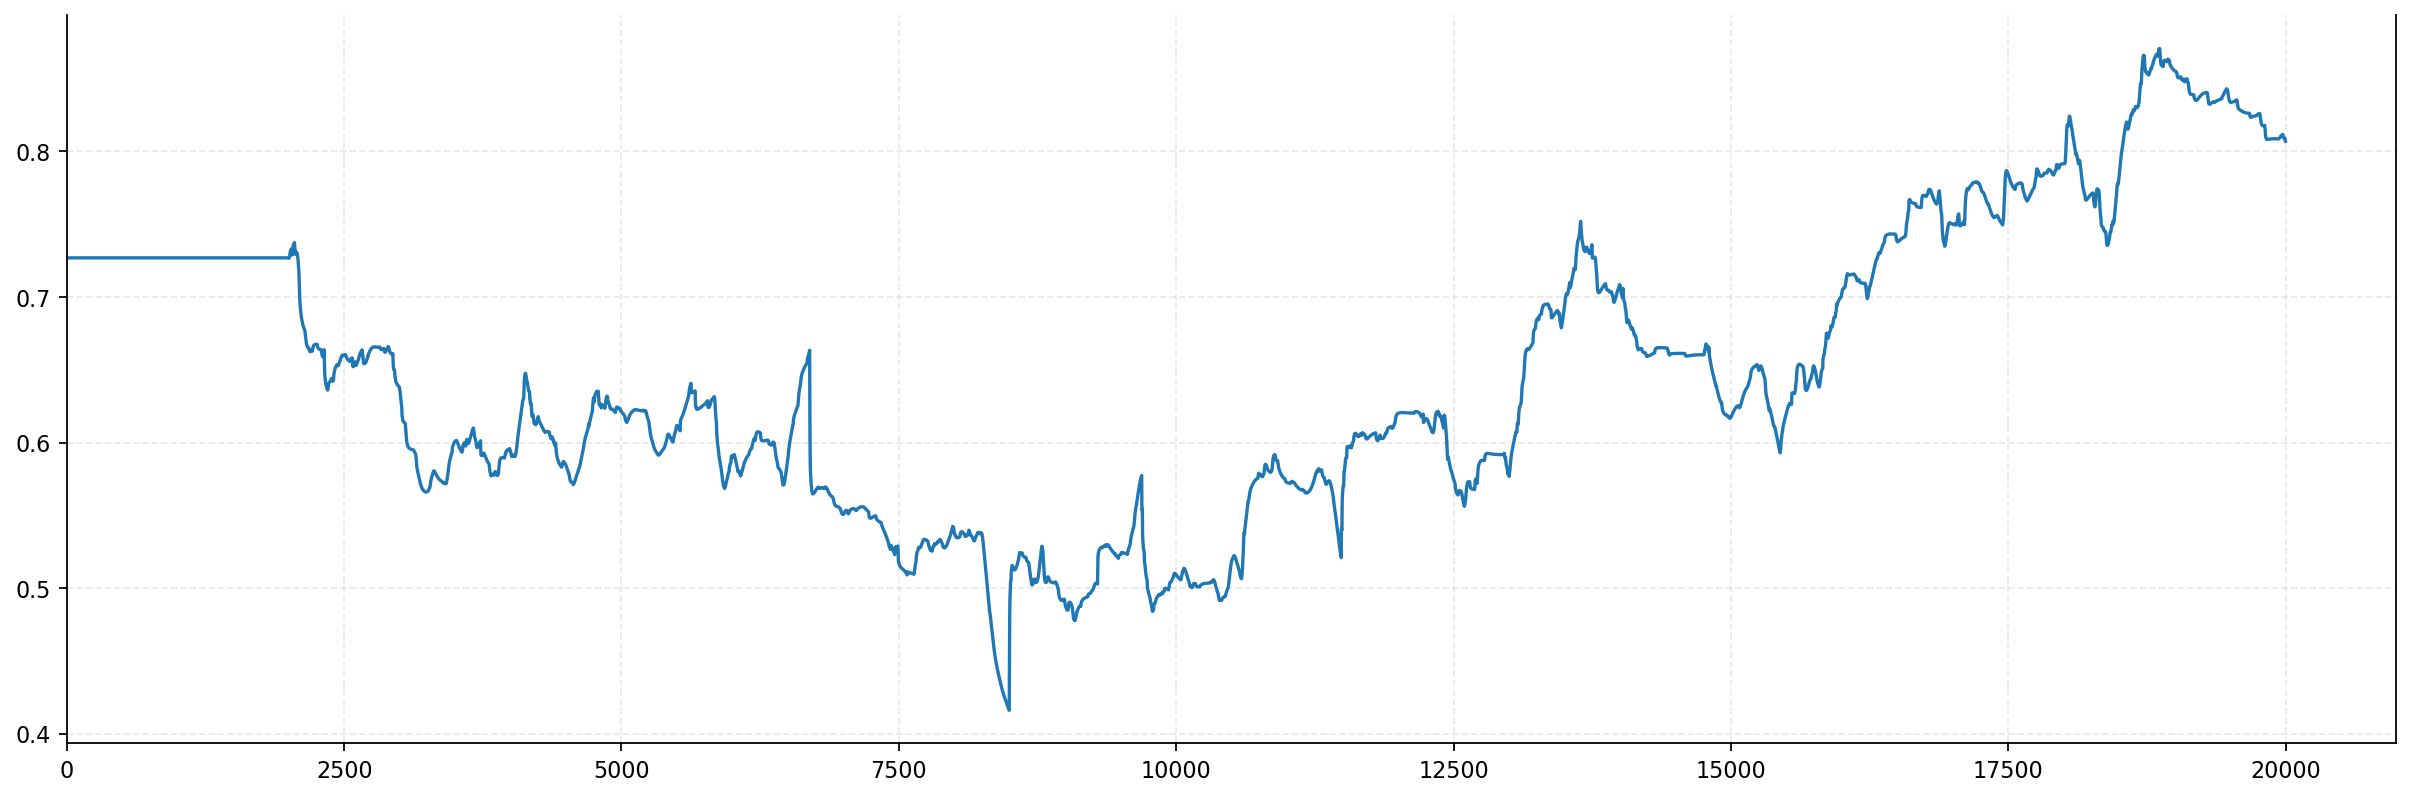

used 14.8633 MiB RAM in 135.53s, peaked 0.00 MiB above current, total RAM usage 391.11 MiB
used 0.0000 MiB RAM in 135.63s, peaked 0.00 MiB above current, total RAM usage 391.11 MiB


In [8]:
h = HurstDMA(T.Price, 2000)
print(h[-10:])
plt.plot(h)
plt.gca().set_xlim(0);

[0.39945078 0.39932644 0.40032113 0.40007595 0.3998309  0.39987844
 0.39961252 0.4006209  0.40044829 0.40040166]


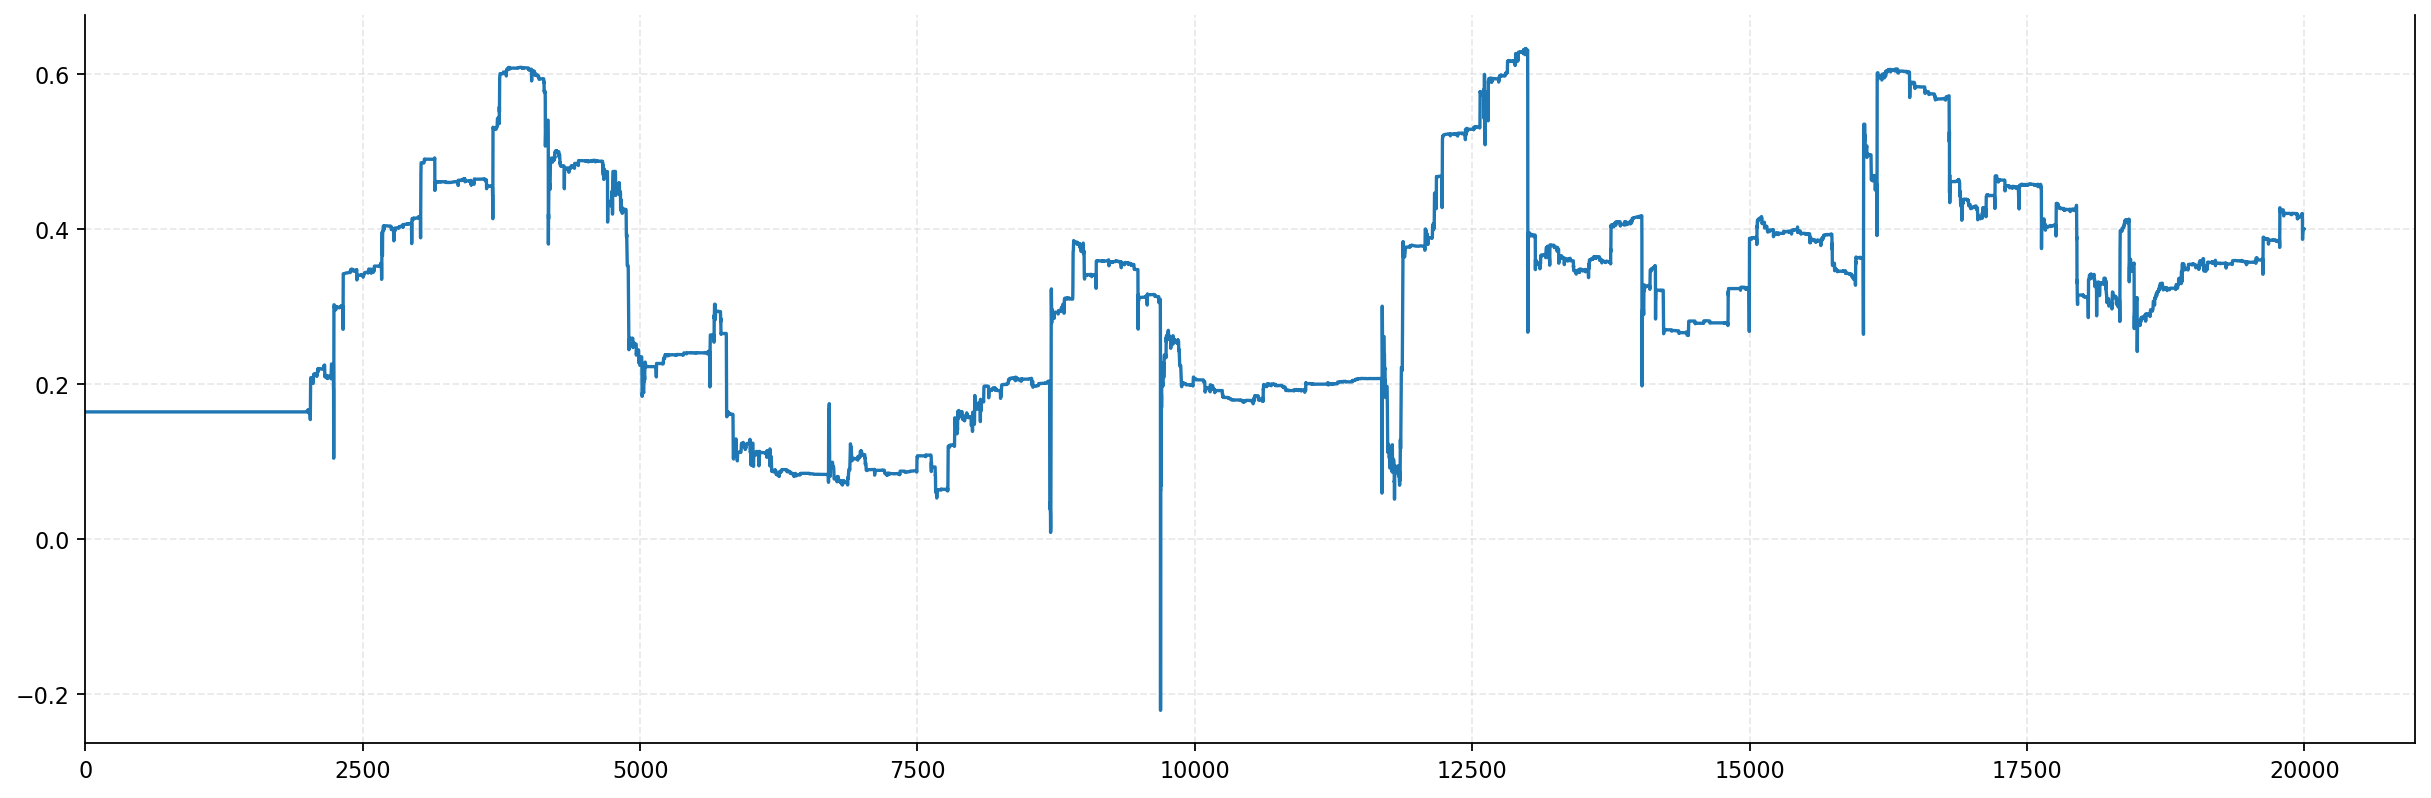

used 7.4570 MiB RAM in 3.02s, peaked 0.00 MiB above current, total RAM usage 398.57 MiB
used 0.0000 MiB RAM in 3.12s, peaked 0.00 MiB above current, total RAM usage 398.57 MiB


In [9]:
h = HurstDSOD(T.Price, 2000)
print(h[-10:])
plt.plot(h)
plt.gca().set_xlim(0);